# Create a class to facilitate convex hull distance calculations

In [591]:
import numpy as np
from scipy.spatial import ConvexHull
from matplotlib import pyplot as plt

In [592]:
npts = 50
xpts = np.linspace(.02, .98, npts)
ypts = -np.random.rand(npts)
points = np.concatenate((np.transpose([xpts,ypts]), np.array([[0,0],[1,0]])))
# print(points)

In [593]:
hull = ConvexHull(points)

In [594]:
# for vert in hull.vertices:
#     print(hull.points[vert, 0], hull.points[vert,1])
#     print(hull.points[vert])
bounds = np.sort(hull.points[hull.vertices][:,0])
bounds

array([0.        , 0.02      , 0.05918367, 0.35306122, 0.70571429,
       0.92122449, 0.96040816, 1.        ])

In [598]:
class chull:
    def __init__(self, hull):
        self.hull = hull
        
        phase_bounds = np.sort(hull.points[hull.vertices][:,0])
        self.domain = [[phase_bounds[i], phase_bounds[i+1]] for i in range(len(phase_bounds)-1)]
        
        
    def make_funcs(self):
        self.piecewise = {}
        
        counter = 0
        for a, b, c in self.hull.equations:
#             print(a, b, c)
            x0, y0 = c * np.array([a,b])
            
            if a != 0:
#                 print(hull.points[hull.vertices][:,0][counter])
#                 self.piecewise[counter]['func']=
#                                             (lambda x, a=a, b=b, c=c,
#                                             x0=x0, y0=y0:
#                                             -(a/b) * (x - x0) + y0
#                                             )
                counter += 1
                
#                 self.piecewise.append(func)
            
            
            
    
tmp = chull(hull)

In [599]:
tmp.domain
# for x1, x2 in tmp.domain:
#     print(x1, x2)
#     for simplex[]

In [502]:
from sympy.solvers import solve
from sympy import Symbol
y = Symbol('y')
a = 1
b = 2
x0 = .4
y0 = 1
x = .5
solve(a*(x-x0) + b*(y-y0), y)



In [652]:
print(hull.points[hull.simplices])

[[[ 1.          0.        ]
  [ 0.          0.        ]]

 [[ 0.05918367 -0.85133776]
  [ 0.35306122 -0.99759388]]

 [[ 0.96040816 -0.56858144]
  [ 1.          0.        ]]

 [[ 0.96040816 -0.56858144]
  [ 0.92122449 -0.83732568]]

 [[ 0.70571429 -0.99620627]
  [ 0.35306122 -0.99759388]]

 [[ 0.70571429 -0.99620627]
  [ 0.92122449 -0.83732568]]

 [[ 0.02       -0.39591144]
  [ 0.          0.        ]]

 [[ 0.02       -0.39591144]
  [ 0.05918367 -0.85133776]]]


In [671]:
from numpy import ones,vstack
from numpy.linalg import lstsq
points = [(1,5),(3,4)]
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]

/home/hayden/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [672]:
class Line(object):

    def __init__(self, data):
            self.first, self.second = data

    def slope(self):
            '''Get the slope of a line segment'''
            (x1, y1), (x2, y2) = self.first, self.second
            try:
                    return (float(y2)-y1)/(float(x2)-x1)
            except ZeroDivisionError:
                    # line is vertical
                    return None

    def yintercept(self, slope):
            '''Get the y intercept of a line segment'''
            if slope != None:
                    x, y = self.first
                    return y - slope * x
            else:
                    return None

    def solve_for_y(self, x, slope, yintercept):
            '''Solve for Y cord using line equation'''
            if slope != None and yintercept != None:
                    return float(slope) * x + float(yintercept)
            else:
                    raise Exception('Can not solve on a vertical line')

    def solve_for_x(self, y, slope, yintercept):
            '''Solve for X cord using line equatio'''
            if slope != 0 and slope:
                    return float((y - float(yintercept))) / float(slope)
            else:
                    raise Exception('Can not solve on a horizontal line')

In [793]:
a = [3, 9, 2, 24, 1, 6]
b = ['a', 'b', 'c', 'd', 'e']
print(sorted(zip(a, b)))
sorted(zip(a, b), key=lambda x: x[1])

[(1, 'e'), (2, 'c'), (3, 'a'), (9, 'b'), (24, 'd')]


[(3, 'a'), (9, 'b'), (2, 'c'), (24, 'd'), (1, 'e')]

(0.0, 0.0)
(0.02, -0.39591144117111354)
(0.05918367346938776, -0.8513377559427865)
(0.35306122448979593, -0.9975938795540293)
(0.7057142857142857, -0.9962062694421303)
(0.9212244897959183, -0.8373256798213766)
(0.9604081632653061, -0.568581438981609)
(1.0, 0.0)


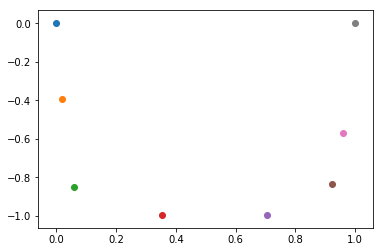

In [818]:
pts = hull.points[hull.vertices]
# for pt in pts:
#     print(pt)
# newpoints = np.transpose(hull.points[hull.simplices])
vals = zip(*np.transpose([*pts]))
sorted_vals = sorted(vals, key=lambda x: x[0])
# print(sort_vals)
# for x, y in pts:
#     print(x, y)
    
print("===========")
for val in sorted_vals:
    print(val)
    plt.scatter(*val)

[[[ 1.          0.05918367  0.96040816  0.96040816  0.70571429
    0.70571429  0.02        0.02      ]
  [ 0.          0.35306122  1.          0.92122449  0.35306122
    0.92122449  0.          0.05918367]]

 [[ 0.         -0.85133776 -0.56858144 -0.56858144 -0.99620627
   -0.99620627 -0.39591144 -0.39591144]
  [ 0.         -0.99759388  0.         -0.83732568 -0.99759388
   -0.83732568  0.         -0.85133776]]]


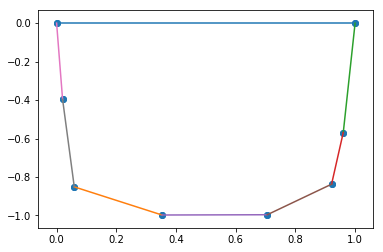

m = -0.0 x0 = 1.0 y0 = 0.0
m = 1.483386398621939 x0 = 0.05918367346938776 y0 = 0.35306122448979593
m = 0.6540266843740844 x0 = 0.9604081632653061 y0 = 1.0
m = 1.150138736740283 x0 = 0.9604081632653061 y0 = 0.9212244897959183
m = 0.7936064347725634 x0 = 0.7057142857142857 y0 = 0.35306122448979593
m = 1.0332739470648642 x0 = 0.7057142857142857 y0 = 0.9212244897959183
m = -0.0 x0 = 0.02 y0 = 0.0
m = 2.1892194810711376 x0 = 0.02 y0 = 0.05918367346938776


In [727]:
pts = hull.points[hull.simplices]
newpoints = np.transpose(hull.points[hull.simplices])
print(newpoints)

# print("Line Solution is y = {m}x + {c}".format(m=m,c=c))


plt.plot(*newpoints)
plt.scatter(*newpoints)
    
plt.show()
for _x, _y in pts:
    dy = _y[1]-_y[0]
    dx = _x[1]-_x[0]
#     print(x[1], x[0])
    
    m = dy / dx
    
    x0 = _x[0]
    y0 = _y[0]
    
    print("m =", dy/dx, "x0 =", x0, "y0 =", y0)
    xpts = np.linspace(x[1], x[0], 10)
    for xpt in xpts: 
        y = m * (xpt - x0) + y0
#     print(y, '\n')

[[[ 1.          0.05918367  0.96040816  0.96040816  0.70571429
    0.70571429  0.02        0.02      ]
  [ 0.          0.35306122  1.          0.92122449  0.35306122
    0.92122449  0.          0.05918367]]

 [[ 0.         -0.85133776 -0.56858144 -0.56858144 -0.99620627
   -0.99620627 -0.39591144 -0.39591144]
  [ 0.         -0.99759388  0.         -0.83732568 -0.99759388
   -0.83732568  0.         -0.85133776]]]


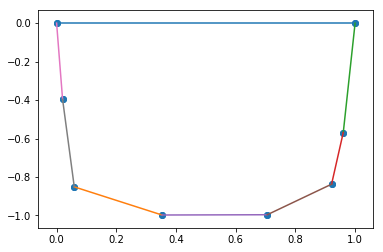

In [706]:

for x, y in hull.points[hull.simplices]:
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    x0 = x[0]
    y0 = y[0]
    
    
    xpts = np.linspace(*x)
#     y = lambda xval, dx=dx, dy=dy, x0=x0, y0=y0 : -(dy / dx) * xval + y0
    
#     plt.plot(xpts, y(xpts))

newpoints = np.transpose(hull.points[hull.simplices])
print(newpoints)

# print("Line Solution is y = {m}x + {c}".format(m=m,c=c))


plt.plot(*newpoints)
plt.scatter(*newpoints)
# plt.show()

# for pt in newpoints:
#     print(pt)
#     print(x0, x1)
#     plt.plot(dx, dy)
    
#     
    #     plt.plot(hull.points[simplex, 0], hull.points[simplex, 1])
#     print(hull.points[simplex, 0], hull.points[simplex, 1])
#     pass
# plt.plot([1,-1,2],[1,2,3])
# print(np.transpose([hull.points[simplex, 0], hull.points[simplex, 1]]))

In [570]:
normal_vecs = []
for a, b, c in hull.equations:
    normal = np.array([a,b])
    
#     xpts = np.linspace()
    offset = c
    vec = offset*normal
    if vec[0] != 0:
        if vec[1] != 0:
            normal_vecs.append(vec)
normal_vecs = np.asarray(normal_vecs)

In [571]:
normal_vecs

array([[-0.99908548,  0.03022718],
       [-0.07930172,  0.97748888],
       [ 0.30108311,  0.58117834],
       [ 0.32316851,  0.42733805],
       [-0.91222759,  0.74413288],
       [-0.88922871,  0.77962571]])

<class 'numpy.ndarray'>
[[-0.99908548  0.03022718]
 [-0.07930172  0.97748888]
 [ 0.30108311  0.58117834]
 [ 0.32316851  0.42733805]
 [-0.91222759  0.74413288]
 [-0.88922871  0.77962571]]


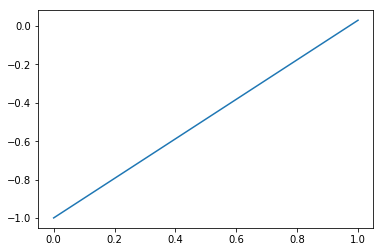

In [580]:

# for vec in normal_vecs[1:-1]:
# #     plt.plot(-1/vec)
#     print(type(vec))
#     plt.scatter(vec[0], vec[:,1])
#     break
print(type(normal_vecs))
print(normal_vecs)
for vec in normal_vecs:

    plt.plot(vec)
    break

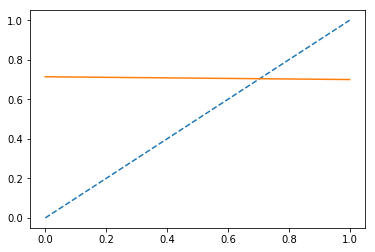

In [590]:
# plot1 = plt.plot()
# plot2 = plt.plot()
for i in range(hull.nsimplex):
    plt.plot(hull.equations[i][0:2], '--')
    plt.plot(hull.simplices[i]/np.linalg.norm(hull.simplices[i]))
    break


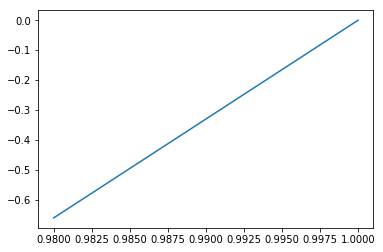

In [579]:
for simplex in hull.simplices[1:]:
#     print(hull.points[simplex, 0], hull.points[simplex, 1])
    plt.plot(hull.points[simplex, 0], hull.points[simplex, 1])
    break
    

In [513]:
print(np.linalg.norm(hull.equations[4][0:2]))
# print(hull.equations[3][0:2])

0.9999999999999999


In [520]:
# equation = {}
# boundary = {}
from sympy import solveset

simplex_data = {}
# counter = 0
for i in range(hull.nsimplex):

    eq = hull.equations[i]
#     print(eq)
    domain = hull.points[hull.simplices[i], 0]
#     simplex_data['equation'] = eq
#     simplex_data['domain'] = domain
    
    
    # set up linear function
    normal_vec = eq[0:-1]
    offset = eq[-1]
    x0, y0 = offset * np.array(normal_vec)
    
    
    if len(normal_vec) == 2:
        a = normal_vec[0]
        b = normal_vec[1]
        print(a,b)
        func = lambda x, a=a, b=b, x0=x0, y0=y0 : np.dot((x - x0) + y0
#         solveset()
    
#     print(domain, func(domain))
    
    simplex_data[i] = {"domain": domain, "function": func}
    


In [521]:
simplex_data[0]

{'domain': array([1., 0.]),
 'function': <function __main__.<lambda>(x, a=0.7519265468445955, b=-0.6592468946838977, x0=-0.8892287101235449, y0=0.7796257071555052)>}

In [487]:
# from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)


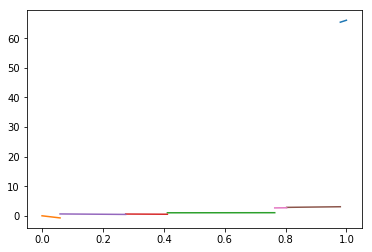

In [484]:
for simplex in simplex_data:
    xpts = np.linspace(*simplex_data[simplex]["domain"], 10)
    ypts = simplex_data[simplex]["function"](xpts)
    
#     print(xpts)#, ypts)
    if simplex != 0:
        plt.plot(xpts, ypts)

In [472]:
for simplex in hull.simplices:
#     print(hull.points[simplex])
    x1, x2 = hull.points[simplex, 0]
    
    
    
#     print(x1-x2)
#     if not abs(x1-x2) == 1:
#         print(sorted([x1, x2]))
    
        

# hull.points[hull.simplices, 0]

In [473]:
# np.unique([0,1]) == np.unique([0,0])

[0.98 1.  ] [-0.66105113  0.        ]
[0.05918367 0.        ] [-0.71648663  0.        ]
[0.7644898  0.41183673] [-0.92190093 -0.95051097]
[0.27469388 0.41183673] [-0.87946325 -0.95051097]
[0.27469388 0.05918367] [-0.87946325 -0.71648663]
[0.80367347 0.98      ] [-0.87720866 -0.66105113]
[0.80367347 0.7644898 ] [-0.87720866 -0.92190093]


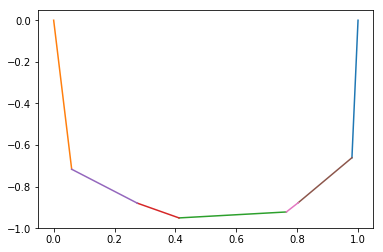

In [198]:
for eq in hull.equations:
    normal = eq[0:-1]
    offset = eq[-1]
    
    x = .5
    if len(normal) == 2:
        a, b = normal
        c = offset
        x0, y0 = c * normal
        y = -(a/b) * (x - x0) + y0
        print(y)

-0.0
-7.542037730876066
5.472049622054106
0.9519012344327706
24.682702229807376
10.58644819009648
0.6168064050964196
0.81752359680592


In [173]:

print(hull.points[[2,3]])

[[ 0.05918367 -0.892731  ]
 [ 0.07877551 -0.60387174]]


In [149]:
tmp.piecewise[0]

KeyError: 0

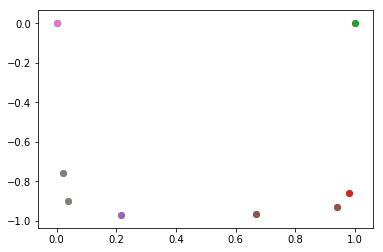

In [105]:
for simplex in hull.simplices:
    plt.scatter(hull.points[simplex, 0], hull.points[simplex, 1])

array([1., 0.])